# Profitable
This code is calculating how many movies fall into each of three categories: profitable, not profitable, and break even

In [1]:
# Set up Dependencies
from progress.bar import IncrementalBar
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import statistics as st
import pandas as pd
import numpy as np
import requests
import time
import nltk
import json
import csv
import sys
import os
import re
from scipy.stats import linregress
from pprint import pprint

In [2]:
# read the data back into the dataframe from the csv file
input_data_file = os.path.join('data_files','good_merged_data.csv')

# write the DataFrame data to the csv file
movie_df = pd.read_csv(input_data_file)

movie_df.head()

,Title,Year,Rated,Released,Runtime,Genre,Language,Awards,imdbRating,imdbVotes,imdbID,Type,Production,Budget,Revenue,ROI%
0,Vulgar,2000,R,26 Apr 2002,87,"Crime, Drama, Thriller",English,NaN,5.3,3876,tt0120467,movie,Lions Gate Films,120000,14904,-87.58
1,Out of the Furnace,2013,R,06 Dec 2013,116,"Action, Crime, Drama, Thriller",English,2 wins & 9 nominations.,6.8,103339,tt1206543,movie,Relativity Media,22000000,15400000,-30.00
2,Coyote Ugly,2000,PG-13,04 Aug 2000,100,"Comedy, Drama, Music, Romance",English,4 wins & 8 nominations.,5.7,104644,tt0200550,movie,Buena Vista,45000000,113916474,153.15
3,Parental Guidance,2012,PG,25 Dec 2012,105,"Comedy, Family",English,1 win & 4 nominations.,6.0,24453,tt1047540,movie,20th Century Fox,25000000,119772232,379.09
4,Raising Helen,2004,PG-13,28 May 2004,119,"Comedy, Drama, Romance",English,1 nomination.,6.0,34868,tt0350028,movie,Buena Vista Pictures,50000000,49718611,-0.56


In [3]:
# create a dataframe containing only profitable movies (ROI over 0)
profitable_df = movie_df.loc[movie_df['ROI%'] > 0]

# create a dataframe containing only break even movies (ROI = 0)
break_even_df = movie_df.loc[movie_df['ROI%'] == 0]

# create a dataframe containing only not profitable movies (ROI under 0)
non_profitable_df = movie_df.loc[movie_df['ROI%'] < 0]
non_profitable_df

,Title,Year,Rated,Released,Runtime,Genre,Language,Awards,imdbRating,imdbVotes,imdbID,Type,Production,Budget,Revenue,ROI%
0,Vulgar,2000,R,26 Apr 2002,87,"Crime, Drama, Thriller",English,NaN,5.3,3876,tt0120467,movie,Lions Gate Films,120000,14904,-87.58
1,Out of the Furnace,2013,R,06 Dec 2013,116,"Action, Crime, Drama, Thriller",English,2 wins & 9 nominations.,6.8,103339,tt1206543,movie,Relativity Media,22000000,15400000,-30.00
4,Raising Helen,2004,PG-13,28 May 2004,119,"Comedy, Drama, Romance",English,1 nomination.,6.0,34868,tt0350028,movie,Buena Vista Pictures,50000000,49718611,-0.56
6,Fair Game,1995,R,03 Nov 1995,91,"Action, Romance, Thriller","English, Russian",4 nominations.,4.3,11848,tt0113010,movie,Warner Home Video,50000000,11534477,-76.93
7,The Girlfriend Experience,2009,R,08 Jul 2009,77,Drama,"English, French",1 nomination.,5.5,15619,tt1103982,movie,Magnolia Pictures,1700000,1007962,-40.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,Diggstown,1992,R,14 Aug 1992,98,"Drama, Sport",English,NaN,7.0,6755,tt0104107,movie,MGM Home Entertainment,17000000,4836637,-71.55
578,The Afflicted,2011,Unrated,01 Mar 2012,85,"Horror, Thriller",English,NaN,4.6,1119,tt1566637,movie,Gravitas,180000,175742,-2.37
579,The Tie That Binds,1995,R,08 Sep 1995,99,"Crime, Drama, Thriller",English,1 nomination.,5.0,1069,tt0114666,movie,Buena Vista,14000000,5830454,-58.35
580,Proof,2005,PG-13,07 Oct 2005,100,"Drama, Mystery",English,Nominated for 1 Golden Globe. Another 4 wins &...,6.7,42455,tt0377107,movie,Miramax Films,20000000,7535331,-62.32


In [4]:
# get the number of movie in each of the three categories & the total number of movies
profitable = len(profitable_df)
break_even = len(break_even_df)
non_profitable = len(non_profitable_df)
total = len(movie_df)

# calculate the percentages for each of the three categories
profit_per = round(profitable/total*100,2)
break_even_per = round(break_even/total*100,2)
not_profit_per = round(non_profitable/total*100,2)

# display the vales and percentages of the three categories
print(f'Profitable: {profitable} ({profit_per}%)')
print(f'Break Even: {break_even} ({break_even_per}%)')
print(f'Non-Profitable: {non_profitable} ({not_profit_per}%)')
print(f'Total: {total}')

Profitable: 395 (67.41%)
Break Even: 1 (0.17%)
Non-Profitable: 190 (32.42%)
Total: 586


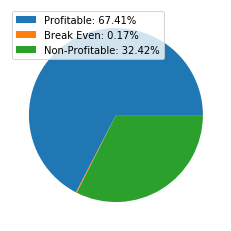

In [6]:
# create a pie chart showing the break down of the categories
plt.pie([profitable, break_even, non_profitable])

# add a legend and include the percentage values in the legend (the break even category was too small to put the percentages on the pie chart itself)
plt.legend([f'Profitable: {profit_per}%', f'Break Even: {break_even_per}%', f'Non-Profitable: {not_profit_per}%'], loc='upper left')

plt.savefig('figures/Profit_Pie_chart')
plt.show()